In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
scans = pd.read_csv('/home/brian/car/lidar/lidar_gui/Debug/recording.csv');
scans['radians'] = scans.degrees * math.pi/180.
scans['x_meters'] = scans.distance_meters*np.cos(scans.radians)
scans['y_meters'] = scans.distance_meters*np.sin(scans.radians)

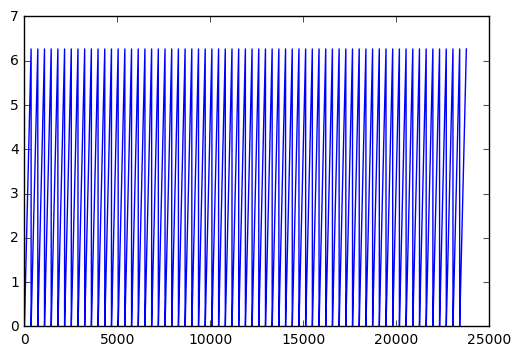

In [31]:
plt.plot(scans.radians)

In [32]:
scan_number = scans.scan_number[0]

In [33]:
scan1 = scans[scans.scan_number == scan_number]


In [34]:
scan1.describe()

,scan_number,degrees,distance_meters,signal_strength,radians,x_meters,y_meters
count,360.0,360.000000,208.000000,208.000000,360.000000,208.000000,208.000000
mean,59.0,179.500000,0.952404,227.740385,3.132866,-0.213057,0.300655
std,0.0,104.067286,0.553170,127.127688,1.816317,0.682845,0.784048
min,59.0,0.000000,0.218000,6.000000,0.000000,-1.242740,-3.092896
25%,59.0,89.750000,0.502000,166.000000,1.566433,-0.749410,-0.240784
50%,59.0,179.500000,0.986000,222.000000,3.132866,-0.255346,0.203078
75%,59.0,269.250000,1.116000,256.250000,4.699299,0.288182,0.857762
max,59.0,359.000000,4.021000,928.000000,6.265732,2.583410,3.124904


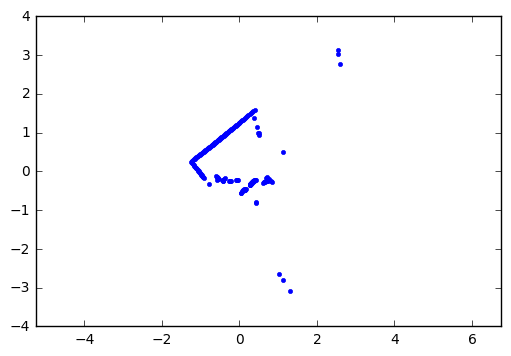

In [37]:
plt.axis('equal')
plt.plot(scan1.x_meters,scan1.y_meters,'b.')

In [ ]:


scan1.distance_meters * scan1.distance_meters

In [70]:
def normalize(h):
    return (float(h[0])/float(h[2]),float(h[1])/float(h[2]),1.)


In [92]:
def distance_point_to_line(p,l):
    return np.abs(np.dot(normalize(l),normalize(p)))

In [102]:
# returns true if all points in x,y are along the same line
# Homeogeneous math here:
#    http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/BEARDSLEY/node2.html
def is_line(x,y,tolerance=0.02):
    # make homogeneous points out of x and y vectors
    points = [(x[i],y[i],1.) for i in range(len(x))]
    line = np.cross(points[0],points[-1])
    print(line)
    for p in points:
        d = distance_point_to_line(p,line)
        if d > tolerance:
            return False
    return True

    

In [103]:
is_line([1.,2.,3.],[1.,1.1,1])

[ 0.  2. -2.]


False

In [97]:
# returns tuples of indexes of endpoints of all lines
# start at an index
# go ccw while still a line
# go cw while still a line
def find_lines(x,y,tolerance=0.1):
    start=0
    end=1
    if is_line(x[start:end], y[star:end], tolerance):
    


SyntaxError: unexpected EOF while parsing (<ipython-input-97-99764ddcc5ba>, line 9)